# imbalanced dataset nlp and visualization

In [6]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

#loading

In [7]:
imbalanced_df = pd.read_csv("data/cleaned_dataset/imbalanced_dataset.csv")

In [8]:
imbalanced_df.shape

(20679, 3)

In [9]:
imbalanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20679 entries, 0 to 20678
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review text    20679 non-null  object
 1   overall        20679 non-null  int64 
 2   review_length  20679 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 484.8+ KB


#lowercasing, removing urls&html tags, removing special characters,numbers,punctuation,emojis


In [10]:
def clean_text(text):
     text = text.lower()
     text = re.sub(r"http\S+|www\S+", "", text)   
     text = re.sub(r"<.*?>", "", text) 
     text = re.sub(r"[^a-z\s]", " ", text)
     text = re.sub(r"\d+", " ", text)#numbers
     text = text.encode('ascii', 'ignore').decode('utf-8')
     text = re.sub(r"\s+", " ", text).strip()    #extra spaces
     return text

In [11]:
imbalanced_df['reviews']=imbalanced_df['review text'].apply(clean_text)

In [12]:
imbalanced_df.info()
imbalanced_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20679 entries, 0 to 20678
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review text    20679 non-null  object
 1   overall        20679 non-null  int64 
 2   review_length  20679 non-null  int64 
 3   reviews        20679 non-null  object
dtypes: int64(2), object(2)
memory usage: 646.3+ KB


,review text,overall,review_length,reviews
0,buttermilk is not included in thali?,1,6,buttermilk is not included in thali
1,!,5,1,
2,"""Daddy, are you crying? Why are you crying?"" T...",5,207,daddy are you crying why are you crying that w...
3,"""Demon Copperhead"" is a powerful and thought-p...",4,287,demon copperhead is a powerful and thought pro...
4,"""Llama Llama Gives Thanks"" is a great addition...",5,94,llama llama gives thanks is a great addition t...


#droping existing review text

In [13]:
imbalanced_df = imbalanced_df.drop(columns=['review text'])

In [14]:
imbalanced_df.head()

,overall,review_length,reviews
0,1,6,buttermilk is not included in thali
1,5,1,
2,5,207,daddy are you crying why are you crying that w...
3,4,287,demon copperhead is a powerful and thought pro...
4,5,94,llama llama gives thanks is a great addition t...


In [15]:
imbalanced_df.tail()

,overall,review_length,reviews
20674,3,99,stylish convenient beautiful boutique hotel lo...
20675,3,1,bakwas
20676,3,6,tasteless totally waste of moneyvery disappoint
20677,3,7,nd i didn t order chole kulche
20678,3,21,brilliant little card good transfer speeds hig...


#recalculating review length after cleaning



In [16]:
imbalanced_df['review_length'] = imbalanced_df['reviews'].str.split().apply(len)

In [17]:
imbalanced_df.head()

,overall,review_length,reviews
0,1,6,buttermilk is not included in thali
1,5,0,
2,5,213,daddy are you crying why are you crying that w...
3,4,302,demon copperhead is a powerful and thought pro...
4,5,94,llama llama gives thanks is a great addition t...


# removing stopwords and applying lemmatization¶

In [18]:
imbalanced_df['words']=imbalanced_df['reviews'].apply(lambda x: x.split())

In [19]:
imbalanced_df.tail()

,overall,review_length,reviews,words
20674,3,101,stylish convenient beautiful boutique hotel lo...,"[stylish, convenient, beautiful, boutique, hot..."
20675,3,1,bakwas,[bakwas]
20676,3,6,tasteless totally waste of moneyvery disappoint,"[tasteless, totally, waste, of, moneyvery, dis..."
20677,3,7,nd i didn t order chole kulche,"[nd, i, didn, t, order, chole, kulche]"
20678,3,21,brilliant little card good transfer speeds hig...,"[brilliant, little, card, good, transfer, spee..."


In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [21]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [22]:
def clean_words_list(words):
    words = [w for w in words if w not in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

#applying to words and saving back 

In [23]:
imbalanced_df['reviews'] = imbalanced_df['words'].apply(clean_words_list)

In [24]:
imbalanced_df.tail()

,overall,review_length,reviews,words
20674,3,101,stylish convenient beautiful boutique hotel lo...,"[stylish, convenient, beautiful, boutique, hot..."
20675,3,1,bakwas,[bakwas]
20676,3,6,tasteless totally waste moneyvery disappoint,"[tasteless, totally, waste, of, moneyvery, dis..."
20677,3,7,nd order chole kulche,"[nd, i, didn, t, order, chole, kulche]"
20678,3,21,brilliant little card good transfer speed high...,"[brilliant, little, card, good, transfer, spee..."


#recheking length

In [25]:
imbalanced_df['review_length'] = imbalanced_df['reviews'].str.split().apply(len)

In [26]:
imbalanced_df.tail()

,overall,review_length,reviews,words
20674,3,96,stylish convenient beautiful boutique hotel lo...,"[stylish, convenient, beautiful, boutique, hot..."
20675,3,1,bakwas,[bakwas]
20676,3,5,tasteless totally waste moneyvery disappoint,"[tasteless, totally, waste, of, moneyvery, dis..."
20677,3,4,nd order chole kulche,"[nd, i, didn, t, order, chole, kulche]"
20678,3,12,brilliant little card good transfer speed high...,"[brilliant, little, card, good, transfer, spee..."


In [27]:
imbalanced_df.head()

,overall,review_length,reviews,words
0,1,3,buttermilk included thali,"[buttermilk, is, not, included, in, thali]"
1,5,0,,[]
2,5,85,daddy cry cry daughter came downstairs morning...,"[daddy, are, you, crying, why, are, you, cryin..."
3,4,160,demon copperhead powerful thought provoking re...,"[demon, copperhead, is, a, powerful, and, thou..."
4,5,52,llama llama give thanks great addition llama l...,"[llama, llama, gives, thanks, is, a, great, ad..."


# filtering reviews


In [28]:
imbalanced_df = imbalanced_df[(imbalanced_df['review_length']>=3)&(imbalanced_df['review_length']<=200)]

In [29]:
#droping words column
imbalanced_df = imbalanced_df.drop(columns=['words'])

In [30]:
imbalanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18690 entries, 0 to 20678
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   overall        18690 non-null  int64 
 1   review_length  18690 non-null  int64 
 2   reviews        18690 non-null  object
dtypes: int64(2), object(1)
memory usage: 584.1+ KB


In [31]:
imbalanced_df.tail()

,overall,review_length,reviews
20673,3,80,fabulous hotel husband stayed beginning august...
20674,3,96,stylish convenient beautiful boutique hotel lo...
20676,3,5,tasteless totally waste moneyvery disappoint
20677,3,4,nd order chole kulche
20678,3,12,brilliant little card good transfer speed high...


#resetting index

In [32]:
imbalanced_df = imbalanced_df.reset_index(drop=True)

In [33]:
imbalanced_df.head()

,overall,review_length,reviews
0,1,3,buttermilk included thali
1,5,85,daddy cry cry daughter came downstairs morning...
2,4,160,demon copperhead powerful thought provoking re...
3,5,52,llama llama give thanks great addition llama l...
4,5,63,moo baa la la la sandra boynton delightful chi...


In [34]:
imbalanced_df.tail()

,overall,review_length,reviews
18685,3,80,fabulous hotel husband stayed beginning august...
18686,3,96,stylish convenient beautiful boutique hotel lo...
18687,3,5,tasteless totally waste moneyvery disappoint
18688,3,4,nd order chole kulche
18689,3,12,brilliant little card good transfer speed high...


In [35]:
print(imbalanced_df['overall'].value_counts())

overall
5    5707
4    4519
3    3813
2    2709
1    1942
Name: count, dtype: int64


#dropping duplicates and null

In [36]:
imbalanced_df =imbalanced_df.drop_duplicates(subset=["reviews"])

In [37]:
print(imbalanced_df.isnull().sum())

overall          0
review_length    0
reviews          0
dtype: int64


In [38]:
imbalanced_df.head()

,overall,review_length,reviews
0,1,3,buttermilk included thali
1,5,85,daddy cry cry daughter came downstairs morning...
2,4,160,demon copperhead powerful thought provoking re...
3,5,52,llama llama give thanks great addition llama l...
4,5,63,moo baa la la la sandra boynton delightful chi...


In [39]:
imbalanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18634 entries, 0 to 18689
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   overall        18634 non-null  int64 
 1   review_length  18634 non-null  int64 
 2   reviews        18634 non-null  object
dtypes: int64(2), object(1)
memory usage: 582.3+ KB


#resetting index

In [40]:
imbalanced_df = imbalanced_df.reset_index(drop=True)

In [41]:
print(imbalanced_df['overall'].value_counts())

overall
5    5683
4    4513
3    3798
2    2701
1    1939
Name: count, dtype: int64


In [42]:
rating_counts = pd.Series({5: 5683, 4: 4513, 3: 3798, 2: 2701, 1: 1939})
rating_percent = (rating_counts / rating_counts.sum()) * 100
print(rating_percent)

5    30.498014
4    24.219169
3    20.382097
2    14.495009
1    10.405710
dtype: float64


# visualization Bar plot:Review count per rating¶

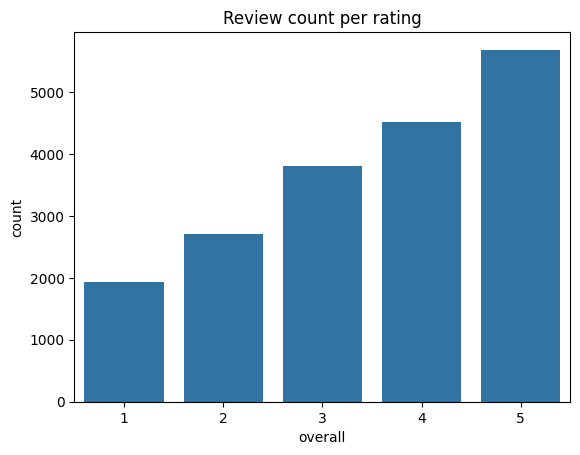

In [43]:
sns.countplot(x="overall", data=imbalanced_df)
plt.title("Review count per rating")
plt.show()

# Box plot:word count distribution¶

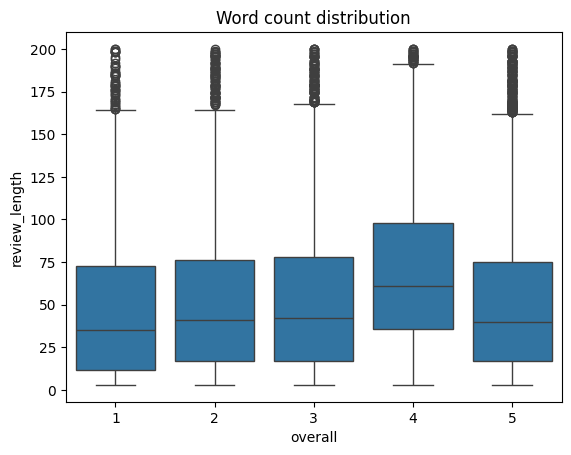

In [44]:
sns.boxplot(x="overall", y="review_length", data=imbalanced_df)
plt.title("Word count distribution")
plt.show()

# displaying samples¶

In [45]:
for rating in sorted(imbalanced_df["overall"].unique()):
    print(f"\n⭐Rating {rating} Sample Reviews:")
    print(imbalanced_df[imbalanced_df["overall"] == rating]["reviews"].head(4).to_list())


⭐Rating 1 Sample Reviews:
['buttermilk included thali', 'nov bought card jan card failed cannot formatted used way lasted month time even using', 'item sada dhosa want delivered quantity less', 'star paid dollar night room small c room got really stuffy n sleep night bedding dirty towel ca n believe expedia rated hotel star room quality dated mention dollar parking fee plus dollar tip total cost plus bottle water kidding oh yea got sick sleeping good trip needless say']

⭐Rating 2 Sample Reviews:
['usd charge toll free mexico city week night spent night sheraton historico rate based favorable review tripadvisor decided try save money second night galleria plaza contrast striking room gp tired tiny dark clean place sleep check morning reviewing charge toll free mci access line number say frequently minor charge usd sheraton night excessive bordered fraud challenged charge check stated posted room extremely excessive clerk kept insisting finally agreed reduce charge usd recommendation s

In [46]:
imbalanced_df

,overall,review_length,reviews
0,1,3,buttermilk included thali
1,5,85,daddy cry cry daughter came downstairs morning...
2,4,160,demon copperhead powerful thought provoking re...
3,5,52,llama llama give thanks great addition llama l...
4,5,63,moo baa la la la sandra boynton delightful chi...
...,...,...,...
18629,3,80,fabulous hotel husband stayed beginning august...
18630,3,96,stylish convenient beautiful boutique hotel lo...
18631,3,5,tasteless totally waste moneyvery disappoint
18632,3,4,nd order chole kulche


In [47]:
imbalanced_df = imbalanced_df.drop('review_length', axis=1)

In [48]:
imbalanced_df

,overall,reviews
0,1,buttermilk included thali
1,5,daddy cry cry daughter came downstairs morning...
2,4,demon copperhead powerful thought provoking re...
3,5,llama llama give thanks great addition llama l...
4,5,moo baa la la la sandra boynton delightful chi...
...,...,...
18629,3,fabulous hotel husband stayed beginning august...
18630,3,stylish convenient beautiful boutique hotel lo...
18631,3,tasteless totally waste moneyvery disappoint
18632,3,nd order chole kulche


# reducing it

In [49]:
samples = {
    1: 1000,   # 10%
    2: 1500,   # 15%
    3: 2000,   # 20%
    4: 2500,   # 25%
    5: 3000    # 30%
}

In [50]:
sampled_dfs = []

for rating, n in samples.items():
    subset = imbalanced_df[imbalanced_df['overall'] == rating]
    sampled = subset.sample(n=n, random_state=42)  
    sampled_dfs.append(sampled)

In [51]:
df_imbalanced = pd.concat(sampled_dfs).sample(frac=1, random_state=42).reset_index(drop=True) 

In [52]:
print(df_imbalanced['overall'].value_counts())
print("Total rows:", len(df_imbalanced))

overall
5    3000
4    2500
3    2000
2    1500
1    1000
Name: count, dtype: int64
Total rows: 10000


# train test split

In [53]:
df_imbalanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   overall  10000 non-null  int64 
 1   reviews  10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#importing input features

In [80]:
X = df_imbalanced['reviews']        
y = df_imbalanced['overall']  

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       
    stratify=y,           
    random_state=42,
)

In [82]:
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print("\nClass distribution in train set:")
print(y_train.value_counts())
print("\nClass distribution in test set:")
print(y_test.value_counts())

Training samples: 8000
Testing samples: 2000

Class distribution in train set:
overall
5    2400
4    2000
3    1600
2    1200
1     800
Name: count, dtype: int64

Class distribution in test set:
overall
5    600
4    500
3    400
2    300
1    200
Name: count, dtype: int64


# vectorization

In [83]:
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')

In [84]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test) 

In [85]:
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)
print("X_train, X_test, y_train, y_test")

X_train shape: (8000, 5000)
X_test shape : (2000, 5000)
y_train shape: (8000,)
y_test shape : (2000,)
X_train, X_test, y_train, y_test


# Logistic Regression

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.3800
SVM Accuracy: 0.4055
Random Forest Accuracy: 0.3920


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [93]:
log_model =LogisticRegression( max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [94]:
log_accuracy = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", log_accuracy)
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.38
              precision    recall  f1-score   support

           1       0.50      0.26      0.34       200
           2       0.18      0.05      0.08       300
           3       0.21      0.12      0.15       400
           4       0.46      0.63      0.54       500
           5       0.36      0.55      0.44       600

    accuracy                           0.38      2000
   macro avg       0.34      0.32      0.31      2000
weighted avg       0.34      0.38      0.34      2000



# Support Vector Machine (SVM)

In [90]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [106]:
svm_model = SVC(class_weight='balanced', kernel='rbf', C=1,random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.3765
              precision    recall  f1-score   support

           1       0.42      0.39      0.40       200
           2       0.17      0.11      0.13       300
           3       0.23      0.16      0.19       400
           4       0.47      0.67      0.55       500
           5       0.40      0.41      0.40       600

    accuracy                           0.38      2000
   macro avg       0.34      0.35      0.34      2000
weighted avg       0.35      0.38      0.36      2000



# decision tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [97]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.2755
              precision    recall  f1-score   support

           1       0.27      0.23      0.24       200
           2       0.16      0.15      0.15       300
           3       0.20      0.18      0.19       400
           4       0.36      0.39      0.37       500
           5       0.31      0.33      0.32       600

    accuracy                           0.28      2000
   macro avg       0.26      0.25      0.26      2000
weighted avg       0.27      0.28      0.27      2000



# randomforest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf_model = RandomForestClassifier(n_estimators=200,max_depth=10, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [108]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.3275
              precision    recall  f1-score   support

           1       0.22      0.61      0.33       200
           2       0.29      0.06      0.10       300
           3       0.25      0.03      0.05       400
           4       0.37      0.80      0.51       500
           5       0.40      0.18      0.24       600

    accuracy                           0.33      2000
   macro avg       0.31      0.33      0.24      2000
weighted avg       0.33      0.33      0.26      2000



In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid (you can adjust)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': [None, 'balanced']
}

# Define model
rf = RandomForestClassifier(random_state=42)

# Create GridSearch with 5-fold CV
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,                  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,             # use all CPU cores
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Test performance
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'class_weight': None, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.393625
Test Accuracy: 0.3925
              precision    recall  f1-score   support

           1       0.50      0.23      0.31       200
           2       0.33      0.01      0.01       300
           3       0.28      0.04      0.06       400
           4       0.41      0.74      0.53       500
           5       0.37      0.59      0.45       600

    accuracy                           0.39      2000
   macro avg       0.38      0.32      0.27      2000
weighted avg       0.37      0.39      0.31      2000



# fine tuning

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [88]:
models = {
    "Logistic Regression": {
        "model": LogisticRegression(class_weight='balanced', max_iter=1000),
        "params": {
            'C': [0.01, 0.1, 1, 10, 100]
        }
    },
    "SVM": {
        "model": SVC(class_weight='balanced'),
        "params": {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}

In [90]:
summary = []

for name, cfg in models.items():
    print(f"\nTuning {name}...")
    
    grid = GridSearchCV(cfg["model"], cfg["params"], scoring="f1_macro", cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)  # Use X_train_res if using SMOTE
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    print("Best Parameters:", grid.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    summary.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Macro F1": round(f1_score(y_test, y_pred, average='macro'), 3),
        "Weighted F1": round(f1_score(y_test, y_pred, average='weighted'), 3)
    })



Tuning Logistic Regression...
Best Parameters: {'C': 1}
Accuracy: 0.33324389589482156
              precision    recall  f1-score   support

           1       0.28      0.46      0.35       388
           2       0.17      0.21      0.19       540
           3       0.24      0.18      0.21       759
           4       0.48      0.56      0.52       903
           5       0.38      0.27      0.32      1137

    accuracy                           0.33      3727
   macro avg       0.31      0.34      0.32      3727
weighted avg       0.34      0.33      0.33      3727


Tuning SVM...
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.37322243090957874
              precision    recall  f1-score   support

           1       0.36      0.38      0.37       388
           2       0.19      0.15      0.17       540
           3       0.23      0.14      0.18       759
           4       0.48      0.64      0.55       903
           5       0.40      0.42      0.41      1137

    accura

In [95]:
final_df_imbalanced = pd.DataFrame(summary_imbalanced)
print("\nFinal Evaluation Summary (Imbalanced Dataset):\n")
display(final_df_imbalanced)


Final Evaluation Summary (Imbalanced Dataset):



,Model,Best Params,Accuracy (%),Precision (Macro),Recall (Macro),F1 (Macro),F1 (Weighted)
0,Logistic Regression,"{'C': 1, 'class_weight': 'balanced'}",33.32,0.311,0.336,0.316,0.328
1,Random Forest,"{'class_weight': 'balanced', 'max_depth': 20, ...",33.83,0.288,0.327,0.265,0.283


<Figure size 800x600 with 0 Axes>

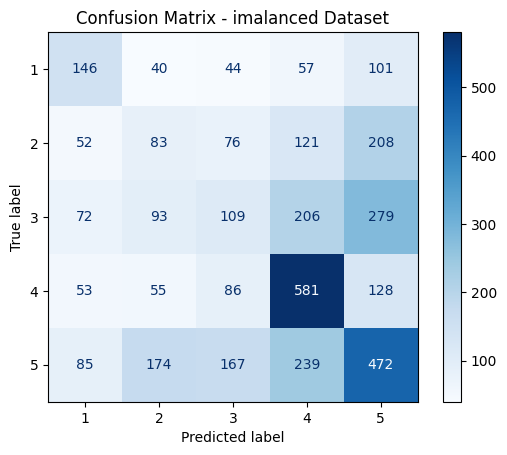

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_balanced = confusion_matrix(y_test, y_pred)
disp_balanced = ConfusionMatrixDisplay(cm_balanced, display_labels=[1,2,3,4,5])

plt.figure(figsize=(8,6))
disp_balanced.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - imalanced Dataset")
plt.show()